### Understanding Classes Using Physics
Creating classes in python has a lot of advantages but when you first learn how to use them it can be very confusing to try and create one for yourself. There are a lot of examples online that attempt to explain classes and they are very helpful, but as a physics student who wants to use python for physics problems, I was dissapointed when I could not find many examples using physical systems. This is my motivation behind the concept of this project and my goal is to improve my understanding of classes and apply it to my experience modelling the physics of rocket flight. After following along with this notebook, it will become very obvious the advantages of using classes and the specifics will be discussed. 

I have annotated this notebook not only for myself but will also make this notebook public for anyone to use. I will do my best to try to explain the purpose of each line of code as well as have markdowns that state what the next cell is going to accomplish. I will also try to include all the necessary physics background to understand the equations used, and I will do my best to explain the mathematical method that I used to create my model. 

### Import Packages
Most the time when you are working with python you need to import some packages that contain the commands and tools we need. As a matter of fact, defining and using classes is something you can do in just the 'raw' python language without the aid of imported libraries and packages. We are importing numpy for the variety of mathematical tools and matplotlib for the plotting tools. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Intro to Classes
Now that I 'bashed' all my resources for the apparent lack of a great introduction to classes I will attempt to give a very simple introduction to classes and do my best to be clear and not assume any prior understanding or terminology or all that jazz.

In python, whenever you try to create some code to do something, what you can do and how you can do it completely depends on type of objects you create. Some examples of different types of objects are:

list = [a, b, c]  --> we defined an object called 'list' and it is of type list

int = 15  --> we defined an object called 'int' and it is of type integer

There are tons of these types that have many different advantages and uses. These types are built in classes that are so common that they became just a part of the basic python language. A list can only have certain functions we will now call methods. For example, we can use the list.append to add elements to the list, but if we did int.append there would be an error because the method .append only applies to lists and not integers. This mechanism of where python recognizes types of objects and uses that information to determine the feasible methods that can be done on that object is a what we call 'object oriented programming'. This is why it is very important when learning python to always be aware of the types of objects you are creating.

The object types, which are built in python classes, are very useful and can do almost everything you would want for a project. However, python provides not only these built in classes, but it allows you create your own. This has a lot of advantages and we hope to make this clear in the examples below.

### Creating a Class
A class is made up of attributes and methods. We already briefly discussed a method as basically being a function that is specific to the class it is defined under. An attribute, in python it corresponds to an input needed to describe the uniqueness of the object of that class. In other words, what are the parameters of the objects that belong to that class. (If that is still unclear follow the first example below where we walk through designing a class and then try coming back to this paragraph.) We define our atributes in the init function. The init function is in every class that has attributes and is simply there to provide a mechanism for defining an object as a member of a class and initialize the inputs as the attributes (again hope this is clear in the example). The init function will always have the self variable as one of its inputs. This self variable can be the trickiest thing to understand for classes. The way I think about it is this, if I have a class A that takes inputs (a, b, c) for its attributes. Then I will use the init function to define the specific inputs from an object as the attributes. So I define object test as test = A(1, 2, 3). Test is now an object of class A with a = 1, b = 2, and c =3. The self variables in the init function is used to define these inputs for a, b, and c as the attributes self.a, self.b, and self.c. The syntax self.{} is used to allow the methods, or function that we define under a class, to have access to the information stored in the object that we define with given inputs. This means that if the methods are functions that include the attributes as variables, then we must use the syntax self.{} in the functions. This also applies if we want to use the output from one method as a variable in another method, we must use the self.{} syntax. This becomes more clear following examples and creating your own classes, but in brief it is a 'signal' that makes the variable available to be used from one method to another. 

### First Step: Projectile Motion
I tried my best to talk through the construction of a class and as most things in python, you will never truly learn these things until you see them and try it for yourself. I am a physics student and so we will go through an example of using a class to solve problems of prjectile motion.

We are going to define a class for projectile. When you solve a problem for projectile motion, you are always given some information. A projectile can be completely described by a velocity, an angle, and a starting position. Therefore, these will be our attributes for this class. From these attributes we can calculate the components of the velocity in the x and y directions, flight time, range, and max height. This calculations will represent our methods. From this we construct our class below and show that is works. 

Attributes --> velocity : v, angle : t, starting position : (x0,y0)

Methods --> We calculate components of velocity : vx and vy, calculate flight time : time, and calculate range and max height : xrange, ymax.

Needed physics concepts and equations:
if we take our angle t to be from horizontal, then we can define the components by:

* $v_x = v\cos(t)$
* $v_y = v\sin(t)$

Now the y component of the velocity can be used to determine the flight time. Basically it becomes a problem of just a ball going up and coming to rest from the acceleration due to gravity g. The time to fall is equal to this so we multiply by a factor of 2. 

* Thus we start from the kinematic equation: $v_f = v_i + at$   (note: t is time here)
* V_f is 0 at apogee and a = g so we solve for time: $t = 2\frac{v_i}{g} $  (note: v_i is v_y)

Now that we have flight time we can find the range. Range is the distance traveled in the x direction. There is no acceleration in this direction so we take the x component in the velocity and use the equation for constant velocity:

* $v = \frac{d}{t} $
* solve for distance: $d = vt$ (very easy)

The only thing left to calculate is the max height. 
* We start from the kinematic equation: $v_f^2 = v_i^2 + 2ad $
* solve for distance and v_f = 0 : $d =\frac{v_i^2}{2a} $

In [2]:
class Projectile:         # syntax for defining class
    def __init__(self, v, t, x0, y0):   # this is the init funct w self and attributes as the inputs
        self.v = v   # here we store each input as an attribute using self.{} 
        self.t = t       # these self.{} variables can be accessed from all methods in the
        self.x0 = x0    # class as long as it is defined and syntax is used
        self.y0 = y0
    
    def calc_vx(self):    # function for x component of velocity
        vx = self.v*np.cos(self.t)  # equation from above
        self.vx = vx  # here we are making vx accessible by other methods using self.{}
        return vx  # here we just output the answer when we call this method
    
    def calc_vy(self):    # same as previous method but for y direction
        vy = self.v*np.sin(self.t)
        self.vy = vy
        return vy
    
    def calc_flight_time(self):   # function for flight time
        g = 9.8    # define accel of gravity
        self.g = g    # make it known by other methods
        time = 2*self.vy/self.g  # equation above
        self.time = time      # make it known by other methods
        return time   # output 
    
    def calc_range(self):   # function for range
        xrange = self.vx*self.time   # equation above
        return xrange   # output
     
    def calc_max_height(self):  # function for max height 
        ymax = self.vy**2/(2*self.g) + self.y0   # function from above
        return ymax  # output

### Test

Always test your code becuase with classes and functions most of the tricky errors do not appear until the class or function is called. The code i created above took me a few attempts to get correct until i got to the final code that is above. 

Now we will define an object Ball of the class Projectile to test the functions.

velocity of 10 m/s , angle of $\pi$/4 radian (45 degrees), and starting from origin

In [3]:
Ball = Projectile(10, 0.25*np.pi, 0, 0)   # syntax for defining an object as member of class

Now we will try all the functions to see if they work. Note the outputs when we execute each method, they are the actual values and the output is from the return command in the function.

In [4]:
Ball.calc_vx()

7.0710678118654755

In [5]:
Ball.calc_vy()

7.0710678118654755

In [6]:
Ball.calc_flight_time()

1.4430750636460152

In [7]:
Ball.calc_range()

10.204081632653061

In [8]:
Ball.calc_max_height()

2.5510204081632657

Good news is the class was set up correctly and all the methods worked. 

### Modify Class Attributes with Arrays and Lists / Functions with Loops

Now we will create an object of the class Projectile but the attributes will be lists so we can run all the calculations for different velocities, angles, and starting positions. This means we need to adjust our class functions to loop through the lists appropriately.

Also, there are now functions to plot the data in the methods for the class Projectile.

In [9]:
# gravity is constant throughout
g = 9.8

#these are the arrays we will pass to the class Projectile when we define the object Ball
angles = [np.pi/8,np.pi/6,np.pi/4,np.pi/3,2*np.pi/5]
v_launch = np.linspace(1,50,50)

#these empty arrays are needed for the calculations to store the results
vx = np.array([np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50)])
vy = np.array([np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50)])
time = np.array([np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50)])
xrange = np.array([np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50)])
ymax =  np.array([np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50),np.zeros(50)])

There's no need for excessive annotation because the structure is the same. Just note that the functions must loop through the angles. Each angle will have 50 different launch velocities that will have all the calculations done in the methods.

In [31]:
class Projectile:
    def __init__(self, v, t):
        self.v = v
        self.t = t
    
    def calc_vx(self):
        for i in range(0,len(angles)):    # we loop thought the list of angles t 
            vx[i] = self.v*np.cos(self.t[i])
            self.vx = vx
        return vx
    
    def calc_vy(self):
        for i in range(0,len(angles)):
            vy[i] = self.v*np.sin(self.t[i])
            self.vy = vy
        return vy
    
    def calc_flight_time(self):
        for i in range(0,len(angles)):
            time[i] = 2*self.vy[i]/g
            self.time = time
        return time
    
    def calc_range(self):
        for i in range(0,len(angles)):
            xrange[i] = self.vx[i]*self.time[i] 
            self.xrange = xrange
        return xrange
    
    def calc_max_height(self):
        for i in range(0,len(angles)):
            ymax[i] = self.vy[i]**2/(2*g) 
            self.ymax = ymax
        return ymax
        
    def plot_t_vs_v(self, fig_size=None): # this new method is for making a plot of t vs v
        fig = plt.figure()   # define a variable fig as plt.figure()
        if fig_size != None:      # this and the line below are simply setting the figure size
            fig.set_size_inches(fig_size[0], fig_size[1]) # for how it will appear in the notebook
        ax = fig.add_subplot(111)  # here we define a variable as this command that adds features to 
        ax.set_title('Flight Time vs. Velocity') # the plot such as title and lables for axes
        ax.set_xlabel('Velcity [m/s]')
        ax.set_ylabel('Time [s]')
        for i in range(0,len(angles)):   # here we loop through the different columns of the arrays
            plt.plot( v_launch, self.time[i], label = angles[i])# that correpsond to the data for each
            plt.legend() # angle. This command plots the first input on x and second input on y
                            # label is for the legend which is added using last command
    def plot_range_vs_v(self, fig_size=None):
        fig = plt.figure()     # same function but plotting range vs velocity
        if fig_size != None:
            fig.set_size_inches(fig_size[0], fig_size[1])
        ax = fig.add_subplot(111)
        ax.set_title('Range vs. Velocity')
        ax.set_xlabel('Velcity [m/s]')
        ax.set_ylabel('Range [m]')
        for i in range(0,len(angles)):
            plt.plot( v_launch, self.xrange[i], label = angles[i])
            plt.legend()
            
    def plot_ymax_vs_v(self, fig_size=None):
        fig = plt.figure()         # same but max height vs velocity
        if fig_size != None:
            fig.set_size_inches(fig_size[0], fig_size[1])
        ax = fig.add_subplot(111)
        ax.set_title('Max Height vs. Velocity')
        ax.set_xlabel('Velcity [m/s]')
        ax.set_ylabel('Height [m]')
        for i in range(0,len(angles)):
            plt.plot( v_launch, self.ymax[i], label = angles[i])
            plt.legend()

Now we are ready to define Ball as projectiles with 50 different launch velocities at 5 different angles. 

In [32]:
Ball = Projectile(v_launch, angles)  # set the inputs for the class as the array and list defined above
Ball.v            # define Ball as this object and we can display Ball.v to show the v_launch array

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [12]:
Vel_x = Ball.calc_vx()   # we test this function. dont wanna see out put so we use variable

In [13]:
Vel_y = Ball.calc_vy()   # test

In [14]:
Time = Ball.calc_flight_time()    # test

In [15]:
Range = Ball.calc_range()   # test

In [16]:
Max_Height = Ball.calc_max_height()   # test. 

No errors for these methods lets look at the plots.

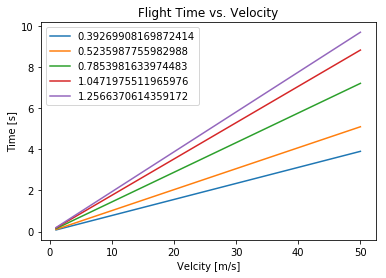

In [17]:
Ball.plot_t_vs_v()  

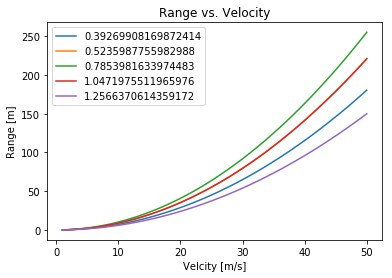

In [18]:
Ball.plot_range_vs_v()

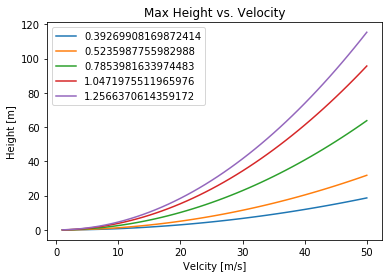

In [19]:
Ball.plot_ymax_vs_v()

Plots look great.

### Second Step: Rocket Motion
We will use the example above and try to make a more complicated class called Rocket. A rocket will have attributes: exhaust velocity, initial mass, burn rate, wind coefficient of the rocket, and burn time. Some constants throughout: acceleration of gravity, projected surface area of the rocket, and the air density.

### Differential Equation of Motion
Our equations of motion are derived directly from the forces acting on the rocket. We consider gravity, thrust, and drag for our rocket. Our rockets do not go high enough to have to consider the change in the force of gravity with distance, thus we can simply use $F_G = mg$. For the force of thrust, we use the equation $F_T = u\dot{m}$, where $u$ is the exhaust velocity and $\dot{m}$ is the burn rate for the fuel. For drag, we use the equation proportional to velocity squared, $F_D = \frac{1}{2}AC_w\rho v^2$, where $A$ is the projected surface area, $C_w$ is the wind coefficient, $\rho$ is the density of air, and $v$ is velocity of the rocket. On the way up, the forces of gravity and drag will point in the same direction while the force of thrust opposes them. We will assume up to be positive and so if we divide the equation for net force by mass of the rocket we get the following equation for the acceleration as a function of time:

$$a = -g -\frac{u\dot{m}}{m_0 + \dot{m}} - \frac{\frac{1}{2}AC_w\rho v^2}{m_0 + \dot{m}t} .$$

You can see that the mass is a function of time equal to: $m(t) = m_0 + \dot{m}t$, where $m_0$ is the initial mass. Mass is decreasing as fuel burns and so it is important to note that $\dot{m}$ is negative. This also implies that the middle term, that corresponds to the thrust, is positive while the other two terms are negative. 

If we write the in the form of a differential equation we get:

$$\frac{dv}{dt} = -g -\frac{u\dot{m}}{m_0 + \dot{m}} - \frac{\frac{1}{2}AC_w\rho v^2}{m_0 + \dot{m}t} .$$

In the function for calculating the kinematics of the rocket you will see a for loop that steps through time in small segments (0.01 sec) and calculates the next steps acceleration by evaluating the equation above with the velocity of the previous step. We not only evaluate the function using small times steps, but we also break that step into pieces and do a weighted average over that step. This weighted average is then used to calculate the velocity at that point in time. Then the process repeats. The specific mathematical approximation used in this notebook is called the Fourth Order Runge Kutta Method, and if you haven't seen or heard of it, it is similiar to other methods of solving differential equations such as Simpson's Rule or Euler's Method. In fact, we apply a simple Simpson's Rule to approximate the position of the rocket over time from the velocity we got from the RK4 method. This notebook will not go any further in depth about the mathematical method of solving our differential equation, but it is encouraged to research this types of mathematical approximations and also to experiment with the effects of step size on the accuracy of the approximation. 

We have arrays for our kinematics (height, velocity, acceleration, time) that will be used for plotting. The steps are for the for loop needed to do the runge kutta approximation on the differential equation f.

Lets define our class.

In [20]:
# Constants
g = 9.8

In [30]:
class Rocket:
    def __init__(self, u, m0, mdot, C_d, tburn):   # here we define the inputs 
        self.u = u         # the init function takes this inputs and uses the self.{}
        self.m0 = m0           # syntax to make them attributes that can be used 
        self.mdot = mdot       # in the method functions below
        self.C_d = C_d
        self.tburn = tburn   # really dont need the burn time other than for the if statement 
        
    def calc_kinematic_arrays(self):  # this is the method for getting our arrays
        #Velocity derivative during burn
        def burn(t, v):   # equation above with values for A and rho 
            f = -g - (self.u*self.mdot)/(self.m0+self.mdot*t)-(0.02*self.C_d*(v)**2)/(self.m0+self.mdot*t)
            return f
        
        #Velocity derivative post burn
        def post_burn(t, v):  # same equation but thrust is taken out after fuel burned
            f = -g -(0.02*self.C_d*(v)**2)/(self.m0+self.mdot*self.tburn)
            return f    # not the mass equation is evaluated at t = tburn
        
        #Velocity derivative post apogee
        def parachute(t,v):  # same equation but now the drag is set for a parachute
            f = -g +(0.0336*(v)**2)/(self.m0+self.mdot*self.tburn)
            return f
        
        #Burn time is 1.1 sec but we will run it for 20 seconds to get the after burn and parachute
        steps = 2000  # number of iterations for the for loop
        h = 0.01  # this is the size of the time step we stated above

        #Initialize the vectors for time and velocity
        t = np.zeros(steps) # these vectors need to have appropriate size before hand and will have 
        v = np.zeros(steps)  # data appended to them as the for loop steps through time
        y = np.zeros(steps) #For Simpson approximation
        a = np.zeros(steps)

        t[0]=0
        v[0]=0
        y[0]=0
        a[0]=0
        #Runge Kutta approximation
        for i in range(0, steps-1):  
            t[i+1] = t[i] + h  # time array just increases by step size
            if t[i] < self.tburn:   # if statement to make sure we are still in the time for fuel burn
                m1 = burn(t[i], v[i])   
                m2 = burn(t[i]+h/2, v[i]+m1*h/2)  # these m's are the differential equation evaluated
                m3 = burn(t[i]+h/2, v[i]+m2*h/2) # at different segements of a single step of h
                m4 = burn(t[i]+h, v[i]+m3*h)
            
                v[i+1] = v[i] + (h/6)*(m1+2*m2+2*m3+m4)  # here is where the weighted average comes in
                a[i+1] = (v[i+1] - v[i])/h   # for plotting
            
            if t[i] >= self.tburn:        # if statement to check if fuel burn completed
                m1 = post_burn(t[i], v[i])    # same approximation but now function for post burn
                m2 = post_burn(t[i]+h/2, v[i]+m1*h/2)
                m3 = post_burn(t[i]+h/2, v[i]+m2*h/2)
                m4 = post_burn(t[i]+h, v[i]+m3*h)
            
                v[i+1] = v[i] + (h/6)*(m1+2*m2+2*m3+m4)
                a[i+1] = (v[i+1] - v[i])/h
                
            if v[i] < 0:    # if statement to check if rocket reached apogee
                m1 = parachute(t[i], v[i])     # same approximation but now parachute deployed
                m2 = parachute(t[i]+h/2, v[i]+m1*h/2)
                m3 = parachute(t[i]+h/2, v[i]+m2*h/2)
                m4 = parachute(t[i]+h, v[i]+m3*h)
            
                v[i+1] = v[i] + (h/6)*(m1+2*m2+2*m3+m4)
                a[i+1] = (v[i+1] - v[i])/h
                
        self.t = t   # when loop is complete we must use the self.{} to make the arrays
        self.v = v   # accessible by the later method functions for plotting
        self.a = a
        
        #Simpson's Approximation
        for j in range(0, steps-2):
            #Three points are required for Simpson's rule, but we don't need the tvalue for pt2.
            pt1 = t[j]   #This corresponds to a in Simpson's rule
            pt3 = t[j+2] #This corresponds to b in Simpson's rule
            y[j+2] = ((t[j+2]-t[j])/6)*(v[j]+4*v[j+1]+v[j+2])+y[j]
            if y[j+2] <= 0:  # we are able to stop the rocket when it hits the ground 
                break  # however a and v will still go (will see in plots)
        self.y = y  # again use self.{} to make it accessible by other methods
            
    
    def create_plot(self, fig_size=None): # this method is for plotting
        fig = plt.figure()
        if fig_size != None:
            fig.set_size_inches(fig_size[0], fig_size[1])
        ax = fig.add_subplot(111)
        ax.set_title('Rocket Kinematics')
        ax.set_xlabel('Time [s]')
        #ax.set_ylabel()
        _ = plt.plot(self.t, self.y, label = 'Height')   # we plot all 3 arrays a, v, and y on the
        _ = plt.plot(self.t, self.v, label = 'Velocity')  # same plot as a function of t 
        _ = plt.plot(self.t, self.a, label = 'Acceleration')
        plt.legend()
        

### Test
As always we will test to see if it worked

In [22]:
Test = Rocket(565.2, 0.0815, -0.0069, 0.04, 1.1)
type(Test)

__main__.Rocket

In [23]:
Test.calc_kinematic_arrays()  

So far no errors lets see what the plot looks like.

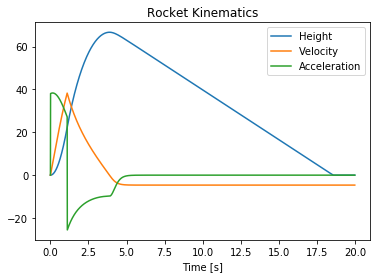

In [24]:
Test.create_plot()

### Plot Breakdown

The green line is acceleration. Right away the acceleration shoots up to almost 40 m/s^2, then it gradually starts to decrease. What happened is the rocket was initially dominated by the thrust force and as velocity increased the drag term was taking effect. After 1.1 sec, we see the acceleration drasitcally decrease to over -20 m/s^2. This is after burn out, so the thrust force disappears and the combination of drag and gravity (both negative) are all thats left. The acceleration decreases in magnitude during this time as it slows down the drag term gets weaker. At approximately 4 sec, the rocket reaches apogee where its velocity is zero and it changes direction and begins to fall back to the ground. Here the drag term flips to positive, working against gravity. This causes the acceleration to go from some negative value and approach zero. We deplot a parachute and so this happens very quickly. This is what we call terminal velocity and is when the force of gravity and the force of drag reach an equilibrium. The acceleration will remain at zero the rest of the flight. 

The yellow/orange line is the velocity. The velocity increases rapidly for the 1.1 sec of burn time. The velocity curve almost appears linear but if you look closely it has a slight bend towards the x axis as it approaches 1.1 sec. After burn out, the velocity drops drastically, as we would expect from our analysis of the acceleration at this point flips to negative. The point where the velocity curve crosses 0 for the y axis correpsonds to the point where the rocket has reached its max height, or apogee. After this point, the velocity curve approaches a negative value where it remains constant. As stated before, after the rocket has reached apogee, it begins to fall back to the ground, and thus the drag term now opposes the force of gravity. They will reach an equilibrium and the velocity will become constant and this velocity is referred to as terminal velocity. This happens very quickly in this case because we deploy a parachute to greatly increase the magnitude of the drag coefficient. The velocity remains constant as the rocket safely floats back to the ground. 

The blue line is the height. During the 1.1 sec of fuel burn the rocket's height increases very sharply. After fuel burn, the acceleration is negative, however the velocity is still positive. While the velocity is still positive the rocket's height will still conitue to increase. However, as we see in the graph, the velocity is positive but decreasing rapidly, this causes the height to tapper off and approach a maximum, the point of apogee. After apogee, we deploy our parachute, approach a safe terminal velocity, and approach the ground. This is represented in the graph by the height curve being linear after apogee. I want to note that the time to apogee was approximately 4 sec and the time to the ground after apogee was approximately 14 sec, which is a clear effect of the parachute. 

### Advantages of Classes and Final Remarks

The goal of this notebook was to provide an introduction to understanding python classes and to see an example of applying it to a physics problem. As a physics student, I find it easiest to learn concepts in python in the scope of a physics application. The examples provided an illustration of how to use a class and I also hope it is clear to see the advantages of using them. When we do physics probelms and models in python it can be easy to start programming the code to be very specific to the current problem you are trying to solve. I personally, have now revisited this rocket modelling project for the third time in my academics. The first two times, I was so abosorbed in trying to get the best accuracy and take every parameter into consideration to get a great model. The obvious limitation is that if you wanted to change the rocket there were still a few changes you would have to make to the code. Thats why this time I wanted to see if my interest in trying to get better with python classes could be used in my interest in studying rocket models. The clear advantage of using classes for this project is that we could very quickly creat multiple objects of the rocket class with varrying inputs. If we run the methods we almost immediately have a lot of data to analyze. This would not be practical using the previous models I had created. It may be good practice to use classes as often as you can for reasons of versatilty. 